# Transformations fixing $L-R$ and $B$

In [2]:
import Permutations as pm
import sympy
from numpy.random import randint as ri
from ToolsForQuasiCord import *

sympy.init_printing()

import itertools

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

## Translations

In [179]:
f, b = 7, 5
N = 50
matrix = np.zeros((N, N), dtype=int)
for t, r in itertools.product(range(N), range(N)):
    c = (t, r + f, b, r)
    try:
        matrix[t][r] = cc(Square(c))
    except:
        pass

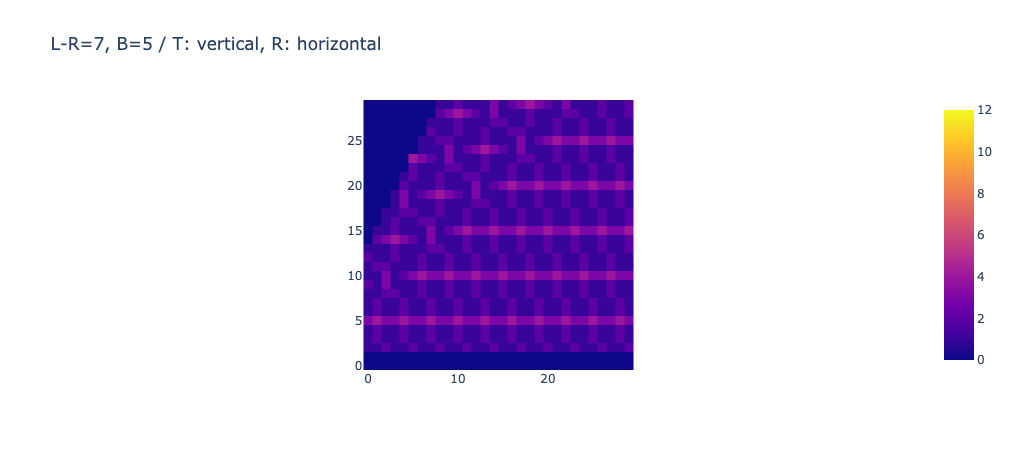

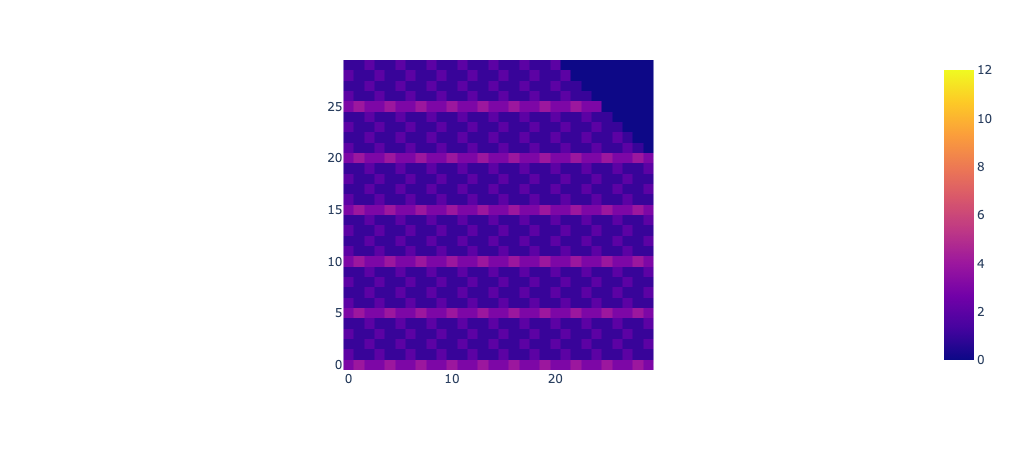

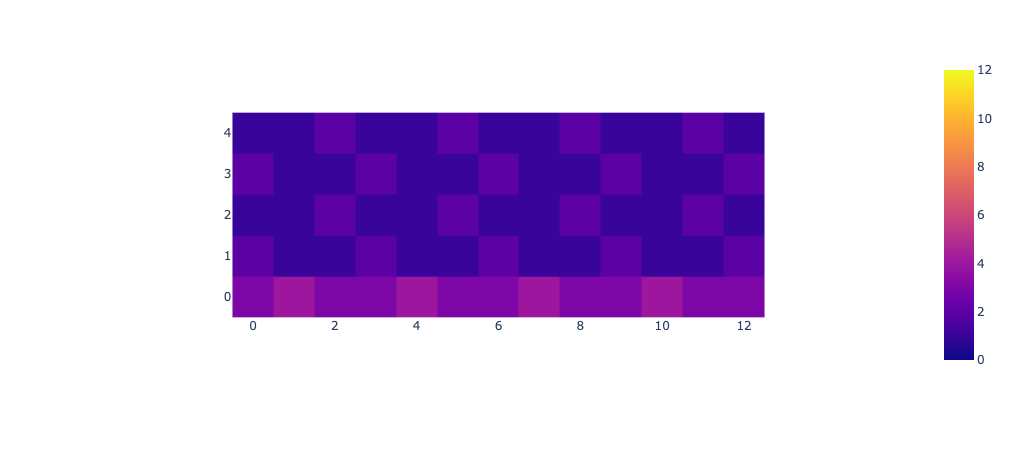

In [180]:
size = 30
# ---
px.imshow(
    matrix[:size, :size],
    origin="lower",
    zmax=12,
    title=f"L-R={f}, B={b} / T: vertical, R: horizontal",
).show()

# ---
shift = max(0, f - b)
tamed_matrix = []
for t in range(b,size+b):
    seq = []
    for i in range(size):
        s = t-b
        try:
            seq += [matrix[t][s + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
px.imshow(tamed_matrix, origin="lower", zmin=0, zmax=12).show()

# ---
tamed_matrix = np.array(tamed_matrix)
fig = px.imshow(
    tamed_matrix[:b,:f+b+1],
    origin="lower",
    aspect="equal",
    zmin=0,
    zmax=12,
)
fig.show()

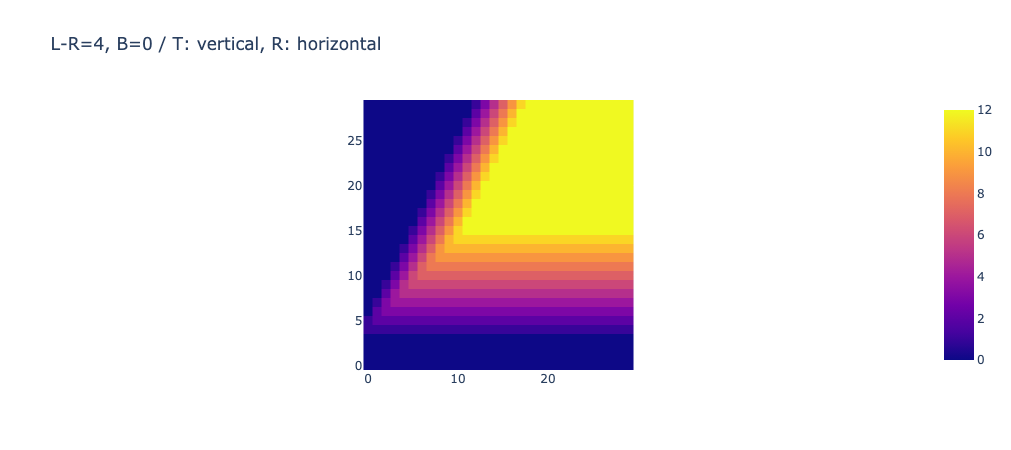

In [200]:
b = 0
N = 30
#---
for f in range(4, 4+1):
    matrix = np.zeros((N, N), dtype=int)
    for t, r in itertools.product(range(N), range(N)):
        c = (t, r + f, b, r)
        try:
            matrix[t][r] = cc(Square(c))
        except:
            pass
    px.imshow(
        matrix,
        origin="lower",
        zmax=12,
        title=f"L-R={f}, B={b} / T: vertical, R: horizontal",
    ).show()

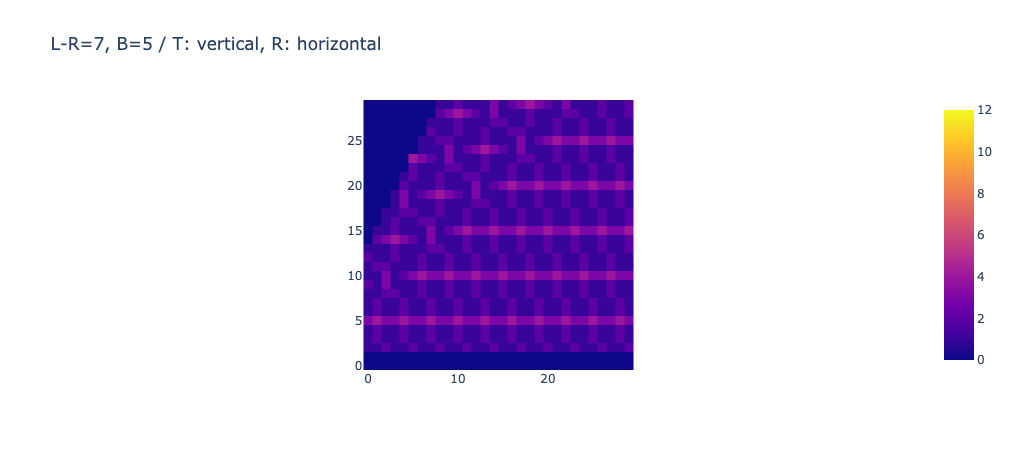

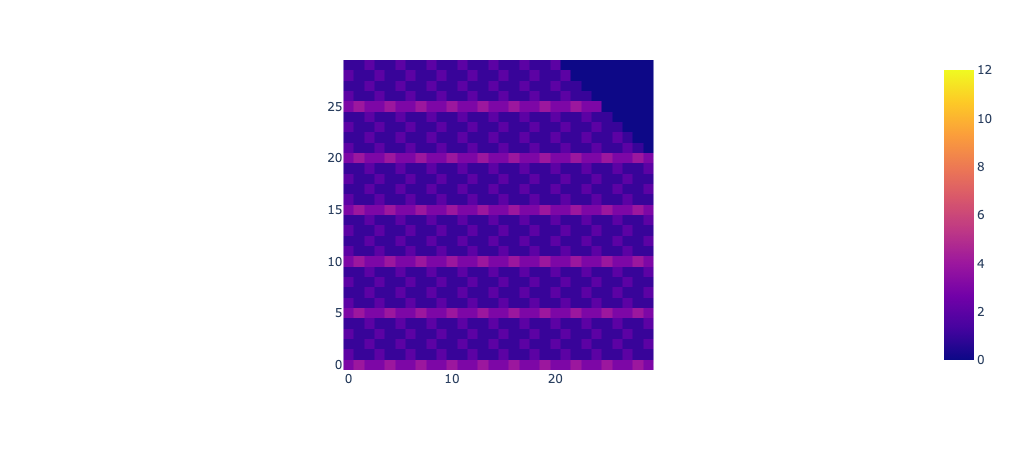

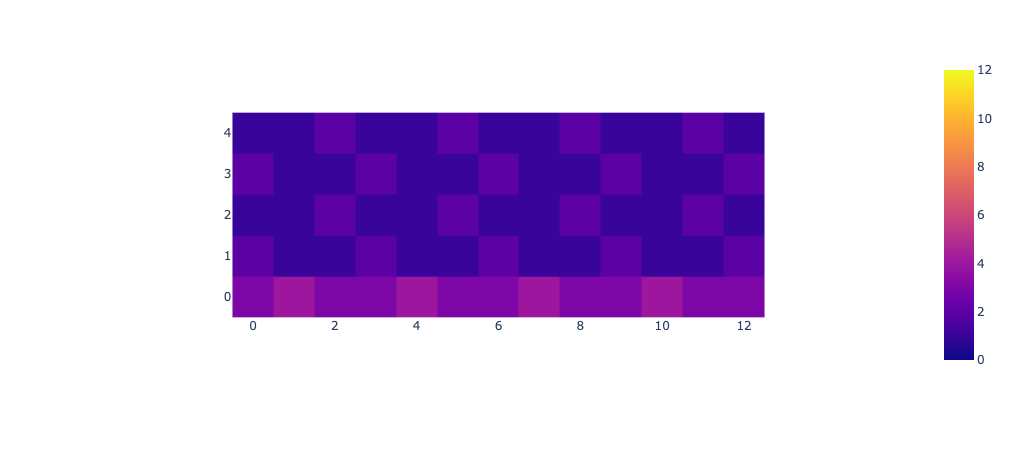

In [180]:

# ---
shift = max(0, f - b)
tamed_matrix = []
for t in range(b,size+b):
    seq = []
    for i in range(size):
        s = t-b
        try:
            seq += [matrix[t][s + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
px.imshow(tamed_matrix, origin="lower", zmin=0, zmax=12).show()

# ---
tamed_matrix = np.array(tamed_matrix)
fig = px.imshow(
    tamed_matrix[:b,:f+b+1],
    origin="lower",
    aspect="equal",
    zmin=0,
    zmax=12,
)
fig.show()

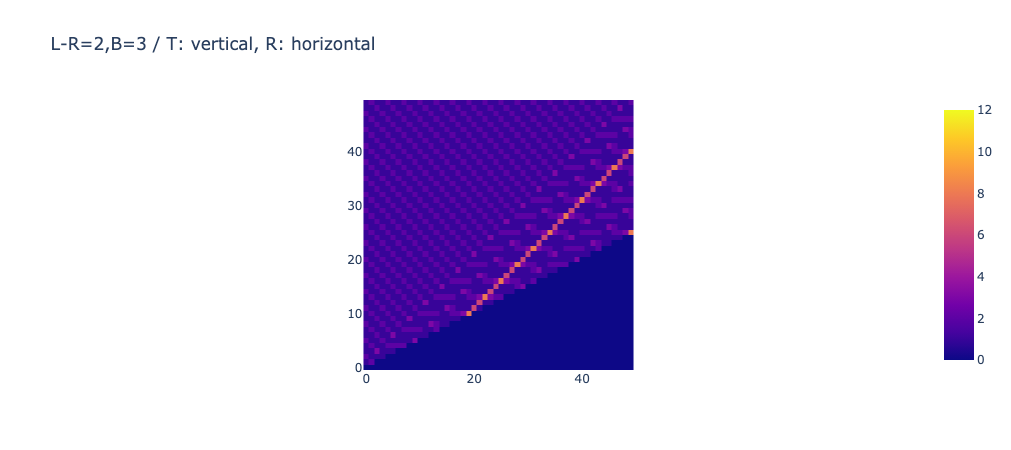

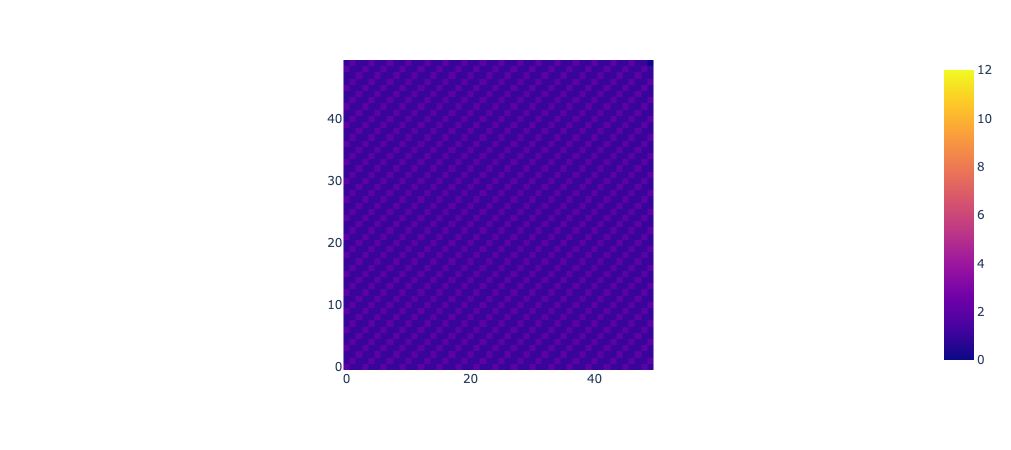

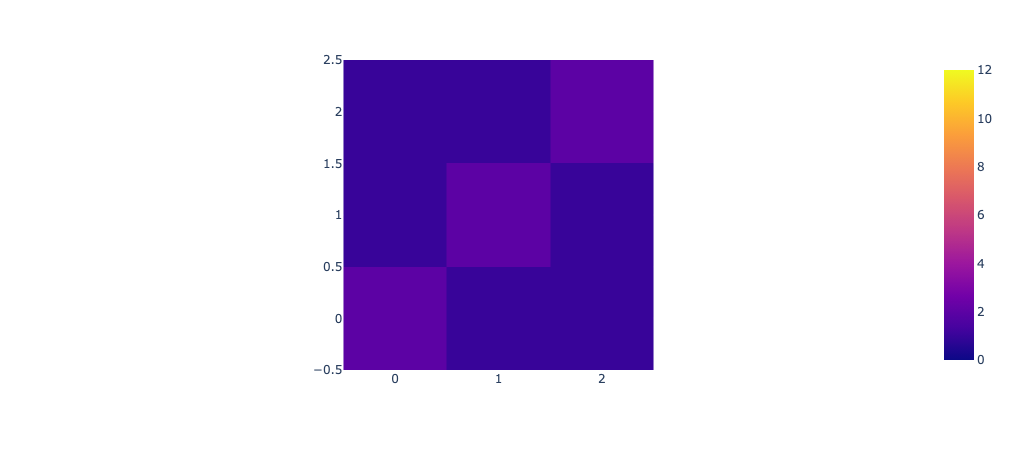

In [91]:
f, b = 2, 3
shift = max(0, f - b)
size = 50
# ---
df = pd.read_csv(f"data/fix_L-R_B/L-R={f}_B={b}_100x100.csv")
px.imshow(
    df.values[:size, shift : shift + size],
    origin="lower",
    zmin=0,
    zmax=12,
    aspect="equal",
    title=f"L-R={f},B={b} / T: vertical, R: horizontal",
).show()

# ---
dftp = np.transpose(df.values)
tamed_matrix = []
for r in range(size):
    seq = []
    s = (b + r - f) + 1  # int((b+r-f)/2)+(b+r-f)%2  #
    for i in range(size):
        try:
            seq += [dftp[shift + r][s + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.transpose(tamed_matrix)
px.imshow(tamed_matrix, origin="lower", zmin=0, zmax=12).show()

# ---
fig = px.imshow(
    tamed_matrix[: 2 * f - 1, shift : (shift + b)],
    origin="lower",
    zmin=0,
    aspect="equal",
    zmax=12,
)
fig.show()

### Translation along T

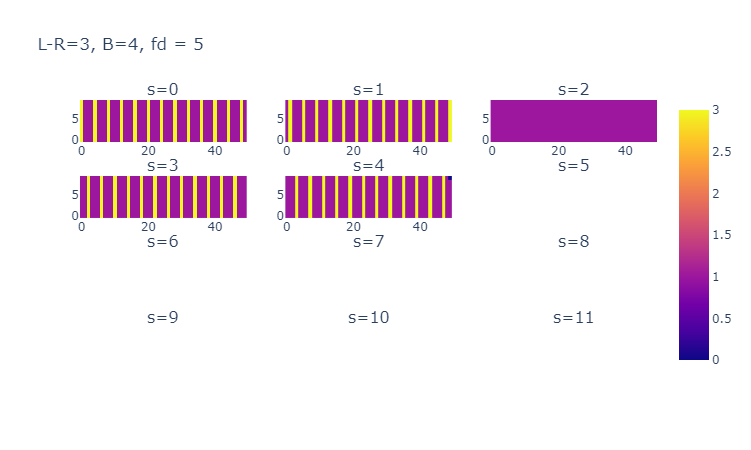

In [45]:
fd = 2 * f - 1
Row, Col = 4, 3
fig = make_subplots(Row, Col, subplot_titles=[f"s={s}" for s in range(Row * Col)])
tmtp = np.transpose(tamed_matrix)  # tamed_matrix  #
# ---
for i, j in itertools.product(range(Row), range(Col)):
    s = i * Col + j
    try:
        mat = [tmtp[s + n * fd] for n in range(int(size / fd))]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(title=f"L-R={f}, B={b}, fd = {fd}")
fig.show()

## Reducing procedure

### Translation along L (and T)

In [89]:
N = 50
count = 0
for itr in tqdm(range(100)):
    b, r = ri(N), ri(N)
    f = ri(N)
    t = ri(r + f + b + r + 1)
    # ---
    c = (t, r + f, b, r)
    sqr = Square(c)
    # ---
    fd = 2 * f - 1
    cn = list(c)
    cn[0] -= fd
    cn = tuple(cn)
    try:
        sqrn = Square(cn)
        n, nn = cc(sqr), cc(sqrn)
        delta = c[0] - (c[1] + c[2] + c[3])
        if n != nn:
            print(f"[{c},{n}],[{cn},{nn}], f={f}, fd={fd}, T-(L+B+R)={delta}")
            if delta < 0:
                coutn += 1
    except Exception as e:
        print(e)
        count += 1
    # ---
print(count)

  0%|          | 0/100 [00:00<?, ?it/s]

Not positive values.


ValueError: L > T+B+R

 $|T,L, B, R|=|T+ed,L+ed, B, R|$ が $L-(B+R) \geq 0$ のときに成立すること。

In [ ]:
N = 100
iteration_count = 200
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)
    c = sqr.code
    ed = abs(2 * (c[0] - c[1]) - 1)
    rd = 2 * c[3] + 1
    # ---
    cn = list(c)
    cn[0] += ed
    cn[1] += ed
    cn[2] += 0
    cn = tuple(cn)
    flag = True
    try:
        sqrn = Square(cn)
    except:
        print(c, ed)
        flag = False
    # ---
    if flag:
        n, nn = cc(sqr), cc(sqrn)
        delta = c[1] - (c[2] + c[3])
        deltat = c[0] - (c[2] + c[3])
        if n != nn:
            print(f"({n},{nn}), ({c},{cn}),ed={ed}, L-(B+R)={delta}, T-(B+R)={deltat}")
            count += 1
print(count)

$|T,L, B, R|=|T+ed,L+ed, B, R|$ が $T-(B+R)$ の正負に依らないこと

In [ ]:
N = 50
pos, neg, err = 0, 0, 0
for itr in tqdm(range(500)):
    b, r, e = ri(N), ri(N), ri(10)
    l = b + r + ri(N)
    t = ri(l - (b + r), N)
    # ---
    c = (t, l, b, r)
    ed = abs(2 * (c[0] - c[1]) - 1)
    delta = l - (b + r)
    deltat = t - (b + r)
    if delta < 0:
        print("Oops")

    try:
        s = Square(c)
        cn = (t + ed, l + ed, b, r)
        sn = Square(cn)
        n, nn = cc(s), cc(sn)
        if deltat > 0:
            pos += 1
        else:
            neg += 1
        if not (n == nn):
            print(n, nn, delta, deltat)
    except Exception as e:
        err += 1
#         print(f"{c},{e}\n")
print(f"pos={pos},neg={neg}, err={err}")

### Translation along B

In [ ]:
N = 50
# ---
c = (t, l, b, r)
sqr = square_random_generator(N)
c = sqr.code
t, b, r, l = c[0], c[1], c[2], c[3]
e = t - l
print(c, cc(sqr))
print(f"T-L={c[0]-c[1]}, L-(B+R)={c[1]-c[2]-c[3]}")
e = c[0] - c[1]
r = c[3]
ed, rd = abs(2 * e - 1), 2 * r + 1
print(f"e={e}, ed={ed}, rd={rd} \n")
# ---

cn = list(c)
cn[0] += rd  # + ed
cn[1] += rd  # + ed
cn[2] += rd
cn = tuple(cn)

sqrn = Square(cn)
print(cn, cc(sqrn))
print(f"T+L={cn[0]+cn[1]}, B+R={cn[2]+cn[3]}, L-(B+R)={cn[1]-cn[2]-cn[3]}")

In [10]:
N = 50
iteration_count = 200
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)  # , True)
    # ---
    c = sqr.code
    rd = 2 * c[3] + 1
    cn = [c[0] + rd, c[1] + rd, c[2] + rd, c[3]]
    # ---
    try:
        sqrn = Square(cn)
        n, nn = cc(sqr), cc(sqrn)
        if n != nn:
            print(f"({n},{nn}), ({c},{cn})")
            count += 1
    except:
        print(c, rd)
# ---
print(count)

  0%|          | 0/200 [00:00<?, ?it/s]

0


## Point refrection

In [ ]:
e, r = 9, 16
shift = max(0, e - r)
size = 50
tamed_matrix = []
df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
for b in range(size):
    seq = []
    s = b + r
    for i in range(size):
        try:
            seq += [df.values[b][s + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.array(tamed_matrix)
# px.imshow(tamed_matrix, origin='lower').show()
# ---
funda_matrix = tamed_matrix[shift : (shift + 2 * r + 1), : 2 * e - 1]
px.imshow(funda_matrix, origin="lower", zmin=0, aspect="equal").show()

pr_matrix = np.zeros((2 * r + 1, 2 * e - 1), dtype=int)
for i, j in itertools.product(range(2 * r + 1), range(2 * e - 1)):
    pr_matrix[i][j] = tamed_matrix[2 * r + 1 - i][2 * e - 1 - j]
px.imshow(pr_matrix, origin="lower", zmin=0, aspect="equal").show()
px.imshow(funda_matrix - pr_matrix, origin="lower", zmin=0, aspect="equal").show()